# Automated data cleaning for chest Xrays 
Work by Candace Makeda Moore, MD, Oleg Sivokon, Andrew Murphy 

## Create example dataset to work off of

Move RANCZR images around for paper

In [185]:
def white_normalize(image_folder, target_folder):
    """
    This function takes X-rays and makes the highest pixel values converge to 255. 
    The "white normalized" pictures are put in a target folder with name norm+original name.
    :param dataframe_label_column: name of dataframe column with label string
    :type dataframe_label_column:string
    :param image_folder: name of folder where images are
    :type image_folder:string
    
    :return: list of titled average images per label
    :rtype: list
    """
    new_pics = []
    suspects = glob.glob(os.path.join(image_folder, '*.jpg'))
    pic_to_nlines = {}
    for pic in suspects:
        img = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
    # load image
    #image = cv2.imread(image_folder+example, cv2.IMREAD_GRAYSCALE)
        pixels = img
# confirm pixel range is 0-255
#         print('Data Type: %s' % pixels.dtype)
#         print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
        pixels = pixels.astype('float32')
# normalize to the range 0-255
        pixels *= 255/pixels.max() 
        #new_pics.append(pixels)
        ho = cv2.imwrite('name',pixels)
        novo = os.path.basename(pic)
        ho.save(os.path.join(target_folder, novo + ".jpg"))    
    return(new_pics)    
# confirm the normalization
#         print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))


In [186]:
origin ='D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/'
tag= 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/try/'
white_normalize(origin, tag)

error: OpenCV(4.5.0) ..\modules\imgcodecs\src\loadsave.cpp:682: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


In [109]:
def avg_image_maker_by_label(master_df,dataframe_image_column, dataframe_label_column, image_folder):
    """
    :param master_df: Dataframe with image location and labels  
    :type master_df: Dataframe   
    :param dataframe_image_column: name of dataframe column with image location string
    :type dataframe_image_column:string
    :param dataframe_label_column: name of dataframe column with label string
    :type dataframe_label_column:string
    :param image_folder: name of folder where images are
    :type image_folder:string
    
    :return: list of titled average images per label
    :rtype: list
    """
    final_img_list = []
    final_name_list = []
    set_of_labels = master_df[dataframe_label_column].unique()
    for name in set_of_labels: 
        sets_of_images = []
    
        list_h = []
        list_w = []
    
        for example in master_df[dataframe_image_column][master_df[dataframe_label_column] == name]:
            example = cv2.imread(image_folder+example, cv2.IMREAD_GRAYSCALE)
            ht= example.shape[0]
            wt= example.shape[1]
            list_h.append(ht)  
            list_w.append(wt)
           # print(example)
        
        h = int(sum(list_h)/len(list_h))    
        w = int(sum(list_w)/len(list_w))
        canvas = np.zeros((h, w))
        for example in  master_df[dataframe_image_column]:
            example = cv2.imread(image_folder+example, cv2.IMREAD_GRAYSCALE)    
            example_small = cv2.resize(example, (w, h))
            canvas += np.array(example_small)
        final_avg = canvas / len(dataframe_image_column)    
        final_img_list.append(final_avg)
        final_name_list.append(name)
    stick = pd.DataFrame(final_name_list)
    stick_data = {'name': final_name_list, 'images': final_img_list}

    df = pd.DataFrame(data=stick_data)


    stick['images'] = final_img_list
    return df
    

In [97]:
def show_images_in_df2(iter_ob, legnth_name):
    """
    Args:
        iter_ob: should be list(df.column)
        legnth_name: size of image name going from end
    Returns: plot of images with names    
        """
    
    
    width = int(math.sqrt(len(iter_ob)))
    height = int(math.ceil(len(iter_ob) / width))
    f, axarr = plt.subplots(width, height, figsize=(14, 14))
    if width > 1:
        for x in range(width):
            for y in range(height):
                element = iter_ob[x * width + y]
                fname = os.path.splitext(element)[0]
                title = fname[-legnth_name:]
                exop = cv2.imread(element, cv2.IMREAD_GRAYSCALE)
                axarr[x, y].set_title(title)
                axarr[x, y].imshow(exop, cmap='gray')
                

    else:
        for y in range(height):
            element = iter_ob[y]
            exop = cv2.imread(element, cv2.IMREAD_GRAYSCALE)
            fname = os.path.splitext(element)[0]
            title = fname[-legnth_name:]
            axarr[y].set_title(title) 
            axarr[y].imshow(exop, cmap='gray')
                    
    #plt.title('Outlier images')        
    return plt.show()

In [60]:
dataframe1 = pd.read_csv(
    'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/Chest_xray_Corona_Metadata.csv',
    )
dataframe2 = dataframe1[dataframe1.Dataset_type == 'TRAIN']


In [61]:
dataframe2

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5281,5304,1-s2.0-S0929664620300449-gr2_lrg-c.jpg,Pnemonia,TRAIN,COVID-19,Virus
5282,5305,1-s2.0-S0929664620300449-gr2_lrg-b.jpg,Pnemonia,TRAIN,COVID-19,Virus
5283,5306,1-s2.0-S0929664620300449-gr2_lrg-a.jpg,Pnemonia,TRAIN,COVID-19,Virus
5284,5307,1-s2.0-S0140673620303706-fx1_lrg.jpg,Pnemonia,TRAIN,COVID-19,Virus


In [110]:
savg_image_set = avg_image_maker_by_label(dataframe2, 'X_ray_image_name', 'Label', 'D:/my_academia/ncs/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/')
    
savg_image_set

,name,images
0,Normal,"[[14306.75, 16104.1875, 16378.875, 16380.125, ..."
1,Pnemonia,"[[14596.3125, 16363.5, 16367.25, 16464.6875, 1..."


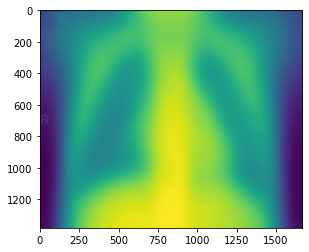

In [118]:
one = savg_image_set.images[1]
one = cv2.resize(one, (1667, 1381)) 
plt.imshow(one)

(1381, 1667)

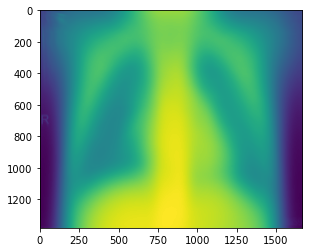

In [116]:
plt.imshow(savg_image_set.images[0])
savg_image_set.images[0].shape

In [159]:
#ho= savg_image_set.images[1] -savg_image_set.images[0]
nu = one - savg_image_set.images[0]
margin1 = nu.min()
nu -= margin1
nu *= 255/nu.max() 

In [165]:
np.histogram(nu)

(array([      6,      22,     128,     609,    2454, 2290176,    7765,
            895,      59,      13], dtype=int64),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))

In [161]:
nu

array([[191.60818453,  67.86229353, 142.66324264, ..., 143.94665555,
        146.18743034, 145.92323344],
       [195.84732946,  70.73030572, 148.81668293, ..., 146.47977336,
        145.48716062, 145.51547668],
       [194.06000405,  69.43581673, 149.35079315, ..., 146.33358624,
        144.53841498, 146.16368182],
       ...,
       [145.20387157, 147.90247674, 143.22319143, ..., 142.9779218 ,
        145.80412094, 144.97343428],
       [129.87624815, 136.18864358, 133.26132939, ..., 129.2775862 ,
        130.20009495, 129.54475211],
       [153.23363117, 159.03614105, 154.68578385, ..., 156.46985887,
        153.85122418, 154.673558  ]])

In [21]:
#EDA images
# function to make average image

def avg_image_maker_by_label(master_df,dataframe_image_column, dataframe_label_column):
    """
    :param master_df: Dataframe with image location and labels  
    :type master_df: Dataframe   
    :param dataframe_image_column:
    :type dataframe_image_column:
    :param dataframe_label_column: 
    :type dataframe_label_column:
    
    :return: list of titled average images per label
    :rtype: list
    """
    set_of_images = []
    
    list_h = []
    list_w = []
    
    for example in set_of_images:
        example = cv2.imread(example, cv2.IMREAD_GRAYSCALE)
        ht= example.shape[0]
        wt= example.shape[1]
        list_h.append(ht)  
        list_w.append(wt)
        
    h = int(sum(list_h)/len(list_h))    
    w = int(sum(list_w)/len(list_w))
    canvas = np.zeros((h, w))
    for example in set_of_images:
        example = cv2.imread(example, cv2.IMREAD_GRAYSCALE)    
        example_small = cv2.resize(example, (w, h))
        canvas += np.array(example_small)
    final_avg = canvas / len(set_of_images)    
    return final_avg

In [308]:


def avg_image_maker(set_of_images):
    """
    :param set_of_images: A set of images,
    can be read in with glob.glob on a folder of jpgs.
    :type set_of_images: list

    :return: final_avg, an image that is the average image of images in the set
    :rtype: nd.array
    """
    list_h = []
    list_w = []

    for example in set_of_images:
        example = cv2.imread(example, cv2.IMREAD_GRAYSCALE)
        ht = example.shape[0]
        wt = example.shape[1]
        list_h.append(ht)
        list_w.append(wt)

    h = int(sum(list_h)/len(list_h))
    w = int(sum(list_w)/len(list_w))
    canvas = np.zeros((h, w))
    for example in set_of_images:
        example = cv2.imread(example, cv2.IMREAD_GRAYSCALE)
        example_small = cv2.resize(example, (w, h))
        canvas += np.array(example_small)
    final_avg = canvas / len(set_of_images)
    return final_avg


In [311]:
def set_image_variability(set_of_images):
    """
    :param list_of_images: Dataframe with image location and labels  
    :type list_of_images: Dataframe   
   
    
    :return: list of titled average images per label
    :rtype: list
    """
    final_avg = avg_image_maker(set_of_images)
      
    h= final_avg.shape[0]
    w= final_avg.shape[1]
    diff = np.zeros((h, w))
    print("diff image", diff.shape)
    for example in set_of_images:
        example = cv2.imread(example, cv2.IMREAD_GRAYSCALE) 
        example_small = cv2.resize(example, (w, h))
        print("example_small image", example_small.shape)
        diff += (example_small - final_avg)**2
        
    final_diff = diff / len(set_of_images)    
    return final_diff
        #compare to corresponding pixels in each image

In [301]:
print(type(avg_image))

<class 'numpy.ndarray'>


In [22]:
savg_image = set_image_variability(
    glob.glob(
        'D:/my_academia/dataset/augment_to_upside_down/*.jpg'
    ))
plt.imshow(savg_image, cmap = 'gray')


NameError: name 'set_image_variability' is not defined

In [310]:
avg_image.shape

(2269, 2638)

In [ ]:
max_slider = 6
# Find the edges in the image using canny detector
edges = cv2.Canny(img,3,300)#, L2gradient = True)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, max_slider, minLineLength=100, maxLineGap=2)

In [ ]:
edges = cv2.Canny(img,3,30)#,apertureSize = 3)
minLineLength = 1
maxLineGap = 25
lines = cv2.HoughLinesP(edges, 1, np.pi/180, max_slider, minLineLength=1, maxLineGap=25)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# Show result

cv2.imwrite('houghlines6.jpg',img)
image_made =cv2.imread('houghlines6.jpg')
plt.imshow( image_made)

In [ ]:
def find_big_lines(directory, line_length):
    """
    Finds number of lines in images at or over the length of 'line_legnth',
    gives back a dataframe with this information
    
    
    """
    suspects = glob.glob(os.path.join(directory, '*.jpg'))
    pic_to_nlines = {}
    for pic in suspects:
        img = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
        edges = cv2.Canny(img,3,100)#,apertureSize = 3)
        minLineLength = 50
        maxLineGap = 2
        max_slider = 6
        lines = cv2.HoughLinesP(
            edges, 1, np.pi/180, 
            max_slider, 
            minLineLength=1, 
            maxLineGap=25
        )
        nlines = 0
        for line in lines:
            # why line[0]- want tocheck all lines in a picture
            if np.linalg.norm(line[0][:2] - line[0][2:]) > line_length:
                nlines += 1
        pic_to_nlines[pic] = nlines

    return pd.DataFrame.from_dict(pic_to_nlines, columns=['nlines'], orient='index')

In [ ]:
liney100 = find_big_lines('D:/my_academia/dataset/augment_to_upside_down', 1000)

In [ ]:
liney100

In [ ]:
liney = find_big_lines('D:/my_academia/dataset/augment_to_upside_down',100)
print(type(liney))

In [ ]:
def show_major_lines_on_image(image): 
    img = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
    max_slider = 6
# Find the edges in the image using canny detector
    edges = cv2.Canny(img,3,100)#, L2gradient = True)
# Detect points that form a line
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, max_slider, minLineLength=30, maxLineGap=20)
# Draw lines on the image
    for line in lines:
        x1, y1, x2, y2 = line[0]
    #if abs(math.sqrt((x2 - x1)**2 + (y2 - y1)**2)) > 0:
        imag_lined = cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    return plt.imshow(imag_lined, cmap = 'gray')# Show result

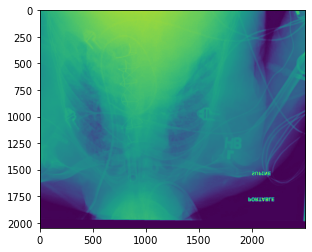

In [7]:
pic = "D:/my_academia/dataset/augment_to_upside_down/1.2.826.0.1.3680043.8.498.99564257536158506118998101216918000997.jpg.jpg"
img = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [8]:
#print(type(lo))

In [9]:
pic = "D:/my_academia/dataset/augment_to_upside_down/1.2.826.0.1.3680043.8.498.99236713642388770230076987284006757631.jpg.jpg"
#img = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
#plt.imshow(img)
#lo = show_major_lines_on_image(pic)
#print(type(lo))

In [109]:
love = img[900:1100, 200:350]
love

array([[142, 142, 144, ..., 114, 114, 115],
       [142, 142, 144, ..., 113, 115, 116],
       [142, 142, 144, ..., 113, 115, 116],
       ...,
       [139, 139, 139, ..., 138, 137, 135],
       [139, 139, 139, ..., 136, 136, 135],
       [138, 138, 138, ..., 134, 135, 135]], dtype=uint8)

In [20]:
images_list = reasonable_rotation_augmentation(0, 360, 100, pic)

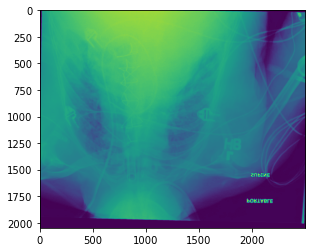

In [46]:
print(len(num_list))

360


In [65]:
def rotate_in_cv2(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

In [124]:
list_of_rotation_angles = range(0,360,10)#plt.imshow(love)

#love2 = cv2.imread(love, cv2.
love2 = rotate_in_cv2(love, 2)
#love3 = cv2.rotate(love,cv2.)
#love4 = cv2.rotate(love,cv2.)
love5 = rotate_in_cv2(love,5)
print(type(love5))

<class 'numpy.ndarray'>


In [ ]:
plt.imshow(love2)

In [67]:
template2 = cv2.imwrite('template.jpg', love)
cv2.imwrite('template2.jpg', love2)

True

In [ ]:
# img = cv2.imread(pic,0)
# cv2.imshow("main",img)
# cv2.waitKey(0)
# template = cv2.imread(r'template1.png',0)
# cv2.imshow("Template",template)
# cv2.waitKey(0)
# w, h = template.shape[::-1]
# methods = [ 'cv2.TM_CCOEFF_NORMED']
# for meth in methods:
    
#     method = eval(meth)# Apply template Matching
#     res = cv2.matchTemplate(img,template,method)
#     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
#     threshold=0.95
#     loc=np.where(res>threshold)
#     if len(loc[0])>0:# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
#         if method in [ cv2.TM_SQDIFF_NORMED]:
#             top_left = min_loc
#         bottom_right = (top_left[0] + w, top_left[1] + h)
#         cv2.rectangle(img,top_left, bottom_right,100,20)
#         plt.subplot(121),
#         plt.imshow(res,cmap = 'gray')
#         plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
#         plt.subplot(122),
#         plt.imshow(img,cmap = 'gray')
#         plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
#         plt.suptitle(meth)
#         plt.show()
#     else:
#         print("Template not matched")

In [ ]:
#import cv2 as cv
#import numpy as np
#from matplotlib import pyplot as plt
# pic = "D:/my_academia/dataset/augment_to_upside_down/1.2.826.0.1.3680043.8.498.99564257536158506118998101216918000997.jpg.jpg"
# #img = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
# img_rgb = cv2.imread(pic)
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# #img_gray = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
# template_name = 'template.jpg'
# template = cv2.imread(template_name,0)
# w, h = template.shape[::-1]
# res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF)
# threshold = 0.58
# loc = np.where( res >= threshold)
# for pt in zip(*loc[::-1]):
#     cv2.rectangle(img_gray, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
# cv2.imwrite('result.jpg',img_rgb)
# result = cv2.imread('result.jpg')

In [ ]:
img_rgb = cv2.imread(pic)
plt.imshow(img_rgb)
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# template = cv2.imread('mario_coin.png',0)
# w, h = template.shape[::-1]

# res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
# threshold = 0.8
# loc = np.where( res >= threshold)
# for pt in zip(*loc[::-1]):
#     cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

# cv2.imwrite('res.png',img_rgb)

In [57]:
#plt.imshow(result)
# list_of_filenames = ['template.jpg','template2.jpg']
# for element in list_of_filenames:
#     template = cv2.imread(element,0)
#whatis = cv2.imread(element,0)
print(type(template))
template.shape

<class 'numpy.ndarray'>


In [ ]:
class SimpleClass:
    """Class docstrings go here."""

    def say_hello(self, name: str):
        """Class method docstrings go here."""

In [70]:

class Rotator:
     """Class Rotator contains the class RotationIterator. """

    class RotationIterator:
         """Class RotationIterator is to build a generator for rotated images"""

        def __init__(self, rotator, start, end, step):
             """Class method docstrings go here."""
            self.rotator = rotator
            self.seq = np.arange(start, end, step)
            self.pos = 0

        def __next__(self):
             """Class method docstrings go here."""
            if self.pos >= len(self.seq):
                raise StopIteration()
            result = self.rotator[self.seq[self.pos]]
            self.pos += 1
            return result

        def __iter__(self):
             """Class method __iter__ returns self"""
            return self

    def __init__(self, image, center=None, scale=1.0):
        """Class method docstrings go here."""
        self.image = image
        self.center = center
        self.scale = scale
        self.h, self.w = self.image.shape[:2]
        if self.center is None:
            self.center = (self.w / 2, self.h / 2)

    def __getitem__(self, angle):
        """credits to: https://stackoverflow.com/a/32929315/5691066
        for this approach to cv2 rotation"""
        # credits to: https://stackoverflow.com/a/32929315/5691066
        matrix = cv2.getRotationMatrix2D(self.center, angle, self.scale)
        rotated = cv2.warpAffine(self.image, matrix, (self.w, self.h))
        return rotated

    def iter(self, start=0, end=360, step=1):
         """Class method iter returns a generator group of images that are on angles from start
         to stop with steps of step.
          Usage example:
         image = cv2.imread('normal-frontal-chest-x-ray.jpg')
         rotator = Rotator(image)
         for rotated in rotator.iter(0, 360, 10):
             print(rotated) # shows the np arrays for all 36 (step of 10) images"""
        return self.RotationIterator(self, start, end, step)

# Usage example:
# image = cv2.imread('normal-frontal-chest-x-ray.jpg')
# rotator = Rotator(image)
# for rotated in rotator.iter(0, 360, 10):
#     print(rotated)


In [75]:
#image = cv2.imread()
rotator = Rotator(love)
generator = rotator.iter(0, 360, 10)
for rotated in generator:
    print(type(rotated))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


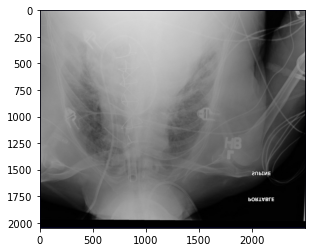

In [61]:

num_list = np.arange(0, 360, 1)
image4R = Image.open(pic)
augmentos = []
for i in num_list: 
    augmentos.append(image4R.rotate(i))
        
# for ij in augmentos:
#     plt.imshow(ij)
    

pic = "D:/my_academia/dataset/augment_to_upside_down/1.2.826.0.1.3680043.8.498.99564257536158506118998101216918000997.jpg.jpg" 
img_rgb = cv2.imread(pic)
copy_image = cv2.imread(pic)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#list_of_filenames = ['template.jpg','template2.jpg']
for element in augmentos:
    #open_cv_image = np.array(element) 
# Convert RGB to BGR 
    #open_cv_image = open_cv_image[:, :, :-1].copy() 
    template_start = np.array(element) 
    #template = cv2.imread(template_start,0)
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = .1
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(copy_image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

result = cv2.imwrite('res7.jpg',copy_image)
#result_forshow = cv2.imread('res7.jpg')
plt.imshow(copy_image)    

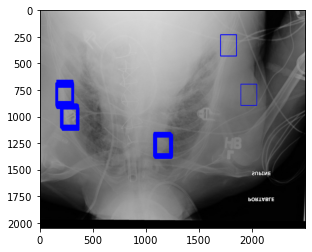

In [127]:
hello = "D:/my_academia/dataset/augment_to_upside_down/1.2.826.0.1.3680043.8.498.99564257536158506118998101216918000997.jpg.jpg" 
pic = "D:/my_academia/dataset/augment_to_upside_down/1.2.826.0.1.3680043.8.498.99564257536158506118998101216918000997.jpg.jpg" 
img_rgb = cv2.imread(pic)
copy_image = cv2.imread(pic)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
list_of_filenames = ['template.jpg','template2.jpg']
rotator_generator = generator
for element in Rotator(love).iter(0, 36.7, 10.7):
#     template = cv2.imread(element,0)
    template = element
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    threshold = .7
    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(copy_image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

result = cv2.imwrite('res7.jpg',copy_image)
#result_forshow = cv2.imread('res7.jpg')
plt.imshow(copy_image)

In [160]:
def simple_spinning_template(picy, greys_template, angle_start, angle_stop, slices, threshold4 = .7):
    """
    :param picy: String for image name of base image
    :type picy: string
    :param greys_template: The image array of the template, 
    :type greys_template: numpy.ndarray
    :param angle_start: angle to spin template to, 
        it would normally start at zero if picking up exact template itself is desired
    :type angle_start: float
    :param angle_stop: last angle to spin template to,
    :type angle_stop: float
    :param slices: number of different templates to make between angles
    :type slices: float
    :param threshold4: A number between zero and one which sets the precision of matching. 
        NB: .999 is stringent, .1 will pick up to much 
    :type threshold4: float    
    
    :return: copy_image, a copy of base image with the template areas caught
        outlined in blue rectangeles
    :rtype: nd.array
    """
    
    pic = picy
    img_rgb = cv2.imread(pic)
    copy_image = cv2.imread(pic)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#list_of_filenames = ['template.jpg','template2.jpg']
    #generator = rotator.iter(0, 360, 10)
    #rotator_generator = generator
    for element in Rotator(greys_template).iter(angle_start, angle_stop, slices):
#     template = cv2.imread(element,0)
        template = element
        w, h = template.shape[::-1]
        res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
        threshold = threshold4
        loc = np.where( res >= threshold)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(copy_image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    return copy_image


In [254]:
def contour_spinning_template(picy, Igreys_template, angle_start, angle_stop, slices, threshold4 = .7):
    """
    :param picy: String for image name of base image
    :type picy: string
    :param Igreys_template: The image array of the template, 
    :type Igreys_template: string
    :param angle_start: angle to spin template to, 
        it would normally start at zero if picking up exact template itself is desired
    :type angle_start: float
    :param angle_stop: last angle to spin template to,
    :type angle_stop: float
    :param slices: number of different templates to make between angles
    :type slices: float
    :param threshold4: A number between zero and one which sets the precision of matching. 
        NB: .999 is stringent, .1 will pick up to much 
    :type threshold4: float    
    
    :return: copy_image, a copy of base image with the template areas caught
        outlined in blue rectangeles
    :rtype: nd.array
    """
    
    pic = picy
    img_rgb = cv2.imread(pic)
    copy_image = make_contour_image(pic)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    new_greys_template = make_contour_image(Igreys_template)
    for element in Rotator(new_greys_template).iter(angle_start, angle_stop, slices):
        template = element
        w, h = template.shape[::-1]
        res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
        threshold = threshold4
        loc = np.where( res >= threshold)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(copy_image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    return copy_image


In [256]:
#import cleanX
template2 = cv2.imwrite('template.jpg', love)
contour_spinning_template(pic, 'template.jpg', 0, 180, 7)
    


ValueError: too many values to unpack (expected 2)

In [231]:
imgL = cv2.imread(pic)
cv2_vers = cv2.__version__
major_cv2 = int(cv2.__version__.split('.')[0])
middle_cv2 = int(cv2.__version__.split('.')[1])
#imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(imgL,0,12)
thresh = 128
#get threshold image
ret,thresh_img = cv2.threshold(edges, thresh, 255, cv2.THRESH_BINARY)
#find contours
#contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

if major_cv2 > 3:
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #ret = imgray.copy 
else:
     ret2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(im.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
#save image   
cv2.imwrite('D:/contours.png',img_contours) 

True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


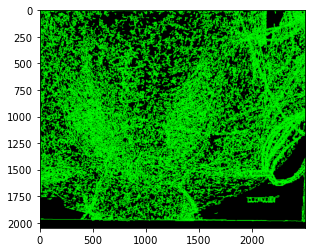

In [232]:
plt.imshow(img_contours)

In [253]:
def make_contour_image(im):
    """
    Makes an image into a contour image
    :param im: image name
    :type im: string

    :return: drawing, the contour image
    :rtype: nd.array
    """
    imgL = cv2.imread(im)
    cv2_vers = cv2.__version__
    major_cv2 = int(cv2.__version__.split('.')[0])

    #imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(imgL,0,12)
    thresh = 128
    #get threshold image
    ret,thresh_img = cv2.threshold(edges, thresh, 255, cv2.THRESH_BINARY)
    #find contours
    if major_cv2 > 3:
        contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
         ret2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #create an empty image for contours
    img_contours = np.zeros(imgL.shape)
    drawing = cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
    return drawing

In [243]:
do = make_contour_image(pic)
print(type(do))

<class 'numpy.ndarray'>


In [208]:
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,60,200)
im2, contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

ValueError: not enough values to unpack (expected 3, got 2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


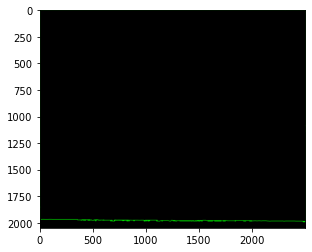

In [204]:
plt.imshow(img_contours)

In [174]:
im = cv2.imread(pic)
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
#plt.imshow(imgray)
#contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(type(contours))

<class 'list'>


In [ ]:
#img = cv.imread('home.jpg')
img = cv2.imread(pic)
gray= cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img)
what= cv2.imwrite('sift_keypoints.jpg',img)

In [ ]:
print(type(what))

In [ ]:
# #img = cv.imread('simple.jpg',0)
# # Initiate ORB detector
# orb = cv2.ORB_create()
# # find the keypoints with ORB
# kp = orb.detect(img,None)
# # compute the descriptors with ORB
# kp, des = orb.compute(img, kp)
# # draw only keypoints location,not size and orientation
# img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
# plt.imshow(img2), plt.show()

In [ ]:
# #img = cv2.imread('resources/1.jpg', cv2.IMREAD_COLOR)
# #compare = cv2.imread('resources/template.jpg', cv2.IMREAD_GRAYSCALE)
# #template = 
# #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.imread(pic, cv2.IMREAD_COLOR)
# compare= cv2.imread('template2.jpg',cv2.IMREAD_GRAYSCALE)
# gray= cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# gray = cv2.bilateralFilter(gray, 11, 17, 17)
# edges = cv2.Canny(gray, 20, 10)
# compare = cv2.Canny(compare, 200, 200)

# contours, _ = cv2.findContours(gray.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# compare_contours, _2 = cv2.findContours(compare.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# for c in contours:
#     for c2 in compare_contours:
#         ret = cv2.matchShapes(c, c2, 1, 0.0)
#         if ret < 0.5:
#             peri = cv2.arcLength(c, True)
#             approx = cv2.approxPolyDP(c, 0.02 * peri, True)
#             cv2.drawContours(img, [approx], -1, (0, 255, 0), 7)

In [ ]:
#  cv2.imshow("Edges",edges)
#  cv2.waitKey(0)

In [ ]:
#  cv2.imshow("compare",compare)
#  cv2.waitKey(0)

In [ ]:
def main():
    img = img_rgb
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray_image, 50, 255, cv2.THRESH_BINARY)
    blur  = cv2.medianBlur(thresh, 7)

    img2, contours, hierarchy = cv2.findContours(~blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    cv2.imshow('original img', img)
    

    cv2.imshow('thresh', thresh)
    cv2.imshow('blur', blur)
    
    cv2.drawContours(img, contours, -1, (255,255,0), 1)
    cv2.imshow('img with roi drawn', img)

    cv2.waitKey(0)
    cv2.destroyAllWindows()
main()    

# if __name__ == '__main__':
#     main()

In [1]:
# libraries
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os 

#import shutil
from PIL import Image, ImageOps
import math
import filecmp
import tesserocr
from tesserocr import PyTessBaseAPI
from filecmp import cmp
from pathlib import Path
import re
import makedalytics as ma

Took images in a to be augmented folder and applied inversion:

In [ ]:
# not_already_inverted = 'D:/my_academia/dataset/augmented_to_inverted'
# aflip_back_target = 'D:/my_academia/dataset/augmented_to_inverted'
# non_suspects = glob.glob(os.path.join(not_already_inverted, '*.jpg'))

# for picy in non_suspects:
#     example = cv2.imread(picy, cv2.IMREAD_GRAYSCALE)
#     flipped2 = np.invert(example)
#     imlot = Image.fromarray(flipped2)
#     imlot.save(os.path.join(aflip_back_target, picy + "inv.jpg"))

Applied mirroring:

In [ ]:

# target_upside_down= 'D:/my_academia/dataset/within_domain_images'
# to_be_target_upside_down = 'D:/my_academia/dataset/within_domain_images'
# non_suspects = glob.glob(os.path.join(target_upside_down, '*.jpg'))
# for picy in non_suspects:
#     example= Image.open(picy)
#     #example = cv2.imread(picy, cv2.IMREAD_GRAYSCALE)
#     mir_over= ImageOps.mirror(example)
#     mir_over.save(os.path.join(to_be_target_upside_down,picy+ "mir.jpg"))

Applied vertical mirroring:

In [ ]:
# target_mirror_down= 'D:/my_academia/dataset/augment_to_veritcal_flipmirror'
# #                     D:/my_academia/dataset/augment_to_veritcal_flipmirror
# to_be_target_mirror_down = 'D:/my_academia/dataset/augment_to_veritcal_flipmirror'
# non_suspects = glob.glob(os.path.join(target_mirror_down, '*.jpgmir.jpg'))
# for picy in non_suspects:
#     example= Image.open(picy)
#     #example = cv2.imread(picy, cv2.IMREAD_GRAYSCALE)
#     mirrored_over= ImageOps.mirror(example)
#     mirrored_over.save(os.path.join(to_be_target_mirror_down,picy+ "lovespive.jpg"))
    


In [ ]:
target_upside_down= 'D:/my_academia/dataset/within_domain_images'
to_be_target_upside_down = 'D:/my_academia/dataset/within_domain_images'
non_suspects = glob.glob(os.path.join(target_upside_down, '*.jpg'))
pic_list = []
for picy in non_suspects:
    pic_list.append(picy)

Start a dataframe

In [ ]:
lists_to_frames1 = pd.DataFrame(pic_list)
lists_to_frames1['problem'] = 'none'
lists_to_frames1['image_path'] = lists_to_frames1[0]

In [ ]:
target_mirror= 'D:/my_academia/dataset/augment_to_veritcal_flipmirror'
#target_upside_down= 'D:/my_academia/dataset/within_domain_images'
non_suspectsB = glob.glob(os.path.join(target_mirror, '*.jpg'))
#non_suspects = glob.glob(os.path.join(target_upside_down, '*.jpg'))
pic_list_mirror = []
for picy in non_suspectsB:
    pic_list_mirror.append(picy)
   

Add to dataframe

In [ ]:
lists_to_frames2 = pd.DataFrame(pic_list_mirror)
lists_to_frames2['problem']= 'mirrored' 
lists_to_frames2['image_path'] = lists_to_frames2[0]
lists_to_frames2

In [ ]:
target_mi= 'D:/my_academia/dataset/augment_to_upside_down'

non_suspectsC = glob.glob(os.path.join(target_mi, '*.jpg'))

pic_list_mi = []
for picy in non_suspectsC:
    pic_list_mi.append(picy)
lists_to_frames3 = pd.DataFrame(pic_list_mi)
lists_to_frames3['problem']= 'upside_down' 
lists_to_frames3['image_path'] = lists_to_frames3[0]
lists_to_frames3   

In [ ]:
target_inv= 'D:/my_academia/dataset/augmented_to_inverted'

non_suspectsD = glob.glob(os.path.join(target_inv, '*.jpg'))

pic_list_inv = []
for picy in non_suspectsD:
    pic_list_inv.append(picy)
lists_to_frames4 = pd.DataFrame(pic_list_inv)
lists_to_frames4['problem']= 'inverted' 
lists_to_frames4['image_path'] = lists_to_frames4[0]
lists_to_frames4  

In [ ]:
target_leaked= 'D:/my_academia/dataset/label_leaked_images'

non_suspectsE = glob.glob(os.path.join(target_leaked, '*.jpg'))

pic_list_leaked = []
for picy in non_suspectsE:
    pic_list_leaked.append(picy)
lists_to_frames5 = pd.DataFrame(pic_list_leaked)
lists_to_frames5['problem']= 'leaked' 
lists_to_frames5['image_path'] = lists_to_frames5[0]
lists_to_frames5.to_csv('leaved.csv')  

In [ ]:
target_origo_inv= 'D:/my_academia/dataset/inverted_images'

non_suspectsF = glob.glob(os.path.join(target_origo_inv, '*.jpg'))

pic_list_Oinv = []
for picy in non_suspectsF:
    pic_list_Oinv.append(picy)
lists_to_frames6 = pd.DataFrame(pic_list_Oinv)
lists_to_frames6['problem']= 'original_inverted' 
lists_to_frames6['image_path'] = lists_to_frames6[0]
lists_to_frames6  

Make one big csv of images and paths

In [ ]:
frames = [lists_to_frames1 ,lists_to_frames2 ,lists_to_frames3 ,lists_to_frames4 ,lists_to_frames5 ,lists_to_frames6] 
result = pd.concat(frames)
result

In [ ]:
#result.to_csv('D:/my_academia/dataset/big_list_images.csv')

Add additional images known to be acceptable i.e. not needing to be cleaned away at random


In [ ]:
def make_df_from_picyinfolder(input_folder, problem):
    target_origo_inv= input_folder

    non_suspectsF = glob.glob(os.path.join(target_origo_inv, '*.jpg'))

    pic_list_Oinv = []
    for picy in non_suspectsF:
        pic_list_Oinv.append(picy)
    lists_to_frames = pd.DataFrame(pic_list_Oinv)
    lists_to_frames['problem']= problem 
    lists_to_frames['image_path'] = lists_to_frames[0]
    return lists_to_frames 
    
list_to_frames7 = make_df_from_picyinfolder('D:/my_academia/dataset/random_within_domain','random_within_domain')

In [ ]:
list_to_frames7

Automated augmentation  code

# This needs fixing- right now only working of jpgs?

In [ ]:
def dimensions_to_df(folder_name):
    non_suspects = glob.glob(os.path.join(folder_name, '*.jpg'))
    picy_list, list_ht, list_wt = [], [], []

    for picy in non_suspects:
        picy_list.append(picy)
        image = cv2.imread(picy, cv2.IMREAD_GRAYSCALE)
        ht, wt= image.shape
        list_ht.append(ht)  
        list_wt.append(wt)
        new_dataframe = pd.DataFrame({
            'images': picy_list,
            'height': list_ht,
            'width': list_wt
        })
    new_dataframe['proportion'] = new_dataframe['height']/new_dataframe['width']
    
    return new_dataframe
    

In [ ]:
dimensions_to_df('D:/my_academia/dataset/NUCLEAR_TO')

In [ ]:
def dimensions_to_histos(folder_name):
    non_suspects = glob.glob(os.path.join(folder_name, '*.jpg'))
    picy_list, list_ht, list_wt = [], [], []

    for picy in non_suspects:
        picy_list.append(picy)
        image = cv2.imread(picy, cv2.IMREAD_GRAYSCALE)
        ht, wt= image.shape
        list_ht.append(ht)  
        list_wt.append(wt)
        new_dataframe = pd.DataFrame({
            'images': picy_list,
            'height': list_ht,
            'width': list_wt
        })
    new_dataframe['proportion'] = new_dataframe['height']/new_dataframe['width']
    n, bins, patches = plt.hist(new_dataframe.height, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85, label = "height")
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('measurement')
    plt.ylabel('Frequency')
    plt.title('Image sizes: heights and widths')
    #plt.text(23, 45, r'$\mu=15, b=3$')
    lovilier = n, bins, patches
    z, bins2, patches2 = plt.hist(new_dataframe.width, bins='auto', color='red',
                            alpha=0.7, rwidth=0.85, label ="width")
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('measurement')
    plt.ylabel('Frequency')
    plt.title('Image sizes: heights and widths')
    lonilier = z, bins2, patches2
    return lovilier, lonilier
    #return  new_dataframe.height.hist(bins = 10),new_dataframe.width.hist(bins = 10)

In [ ]:
bins = np.arange(1600, 2501, 50)

# Set up a figure with set of axes
fig, ax = plt.subplots(1, 1)

# Add axis labels
ax.set_xlabel('Cross-sectional area (µm$^2$)')
ax.set_ylabel('count');

# Generate the histogram for the low-density fed mother
_ = ax.hist((xa_low, xa_high), bins=bins)

# Add a legend
ax.legend(('low', 'high'), loc='upper right');

In [ ]:
def dimensions_to_histosax(folder_name, bins_count=10):
    """
    Looks in the directory given, and produces a histogram of variosu widths
    and heights.Important information as many neural nets take images all the
    same size. Clasically most chestXrays are 2500*2000 or 2500 *2048;
    however the dataset may be different and/or varied

    :param folder_name: folder_name, directory name
    :type folder_name: string
    :param bins_count: bins_count, number of bins desired (defaults to 10)
    :type bins_count: int

    :return: histo_ht_wt, a labeled histogram
    :rtype: nd.array

    """
    non_suspects = glob.glob(os.path.join(folder_name, '*.jpg'))
    picy_list, list_ht, list_wt = [], [], []

    for picy in non_suspects:
        picy_list.append(picy)
        image = cv2.imread(picy, cv2.IMREAD_GRAYSCALE)
        ht, wt = image.shape
        list_ht.append(ht)
        list_wt.append(wt)
        new_datafrme = pd.DataFrame({
            'images': picy_list,
            'height': list_ht,
            'width': list_wt
        })
    new_datafrme['proportion'] = new_datafrme['height']/new_datafrme['width']
    fig, ax = plt.subplots(1, 1)

    # Add axis labels
    ax.set_xlabel('dimension size')
    ax.set_ylabel('count')

    # Generate the histogram
    histo_ht_wt = ax.hist(
        (new_datafrme.height, new_datafrme.width),
        bins=bins_count
    )

    # Add a legend
    ax.legend(('height', 'width'), loc='upper right')
    return histo_ht_wt

In [ ]:
def proportions_ht_wt_to_histo(folder_name, bins_count=10):
    """
    Looks in the directory given, and produces a histogram of various proportions
    of the images by dividing their height by widths.
    Important information as many neural nets take images all the
    same size. Clasically most chestXrays are 2500*2000 or 2500 *2048;
    however the dataset may be different and/or varied
    :param folder_name: folder_name, directory name
    :type folder_name: string
    :param bins_count: bins_count, number of bins desired (defaults to 10)
    :type bins_count: int
    :return: histo_ht_wt_p, a labeled histogram
    :rtype: tuple
    """
    non_suspects = glob.glob(os.path.join(folder_name, '*.jpg'))
    picy_list, list_ht, list_wt = [], [], []

    for picy in non_suspects:
        picy_list.append(picy)
        image = cv2.imread(picy, cv2.IMREAD_GRAYSCALE)
        ht, wt = image.shape
        list_ht.append(ht)
        list_wt.append(wt)
        new_datafrme = pd.DataFrame({
            'images': picy_list,
            'height': list_ht,
            'width': list_wt
        })
    new_datafrme['proportion'] = new_datafrme['height']/new_datafrme['width']
    fig, ax = plt.subplots(1, 1)

    # Add axis labels
    ax.set_xlabel('proportion height/width')
    ax.set_ylabel('count')

    # Generate the histogram
    histo_ht_wt_p = ax.hist(
        (new_datafrme.proportion),
        bins=bins_count
    )

    # Add a legend

    return histo_ht_wt_p

In [ ]:
def forsee_some_bias(df, list_senstive_columns, label):
    
    picy_list, sensitive = [], []

    for picy in non_suspects:
        picy_list.append(picy)
        sensitive = df.list_sensitive_columns
        new_datafrme = pd.DataFrame({
            'images': picy_list,
            'sensitive': sensitive,
            
        })
    

In [ ]:
cars = {'Name': ['Leo Tovo', 'Linus May','A.J. Smith','Hope Civic','Theodore Carol','Fungi Focus','Audi Allo','Harold Cho', 'Leo Kim', 'malachi Veno'],
        'Gender': ['M','M','M','M','F','M','M','M','M','M'],
        'Race': ['white', 'asian', 'white','black', 'asian','latinx','white', 'asian', 'asian', 'asian'],
        'Label': ['CA', 'WNL', 'CA', 'WNL', 'CA', 'WNL','CA', 'WNL', 'CA', 'WNL',],
        'Hair_color': ['g', 'g', 'g', 'g', 'g', 'g','g', 'g', 'g', 'g',]
        }

example = pd.DataFrame(cars, columns = ['Name', 'Gender', 'Race','Label','Hair_color'])
example.to_csv('example_for_bias.csv')


In [ ]:
def see_part_potential_bias(df, label, sensitive_column_list):
    """
    This function gives you a tabulated dataframe of sensitive columns e.g. gender, race, or
    whichever you think are relevant, in terms of a labels (put in the label column name).
    You may discover all your pathologically labeled sample are of one ethnic group,
    gender or other category in your dataframe. Remeber some early neural nets
    for chest-Xrays were less accurate in women and the fact that there were fewer Xrays
    of women in the datasets did not help
    
    :param df: dataframe that includes at least your sample names, labels, and sensitive columns
    :type df: Dataframe
    
    :return: tab_fight_bias2, a neatly sorted dataframe
    :rtype: Dataframe
    """
       
    label_and_sensitive_column_list = [label]+sensitive_column_list
    tab_fight_bias = pd.DataFrame(example[label_and_sensitive_column_list].value_counts())
    tab_fight_bias2 = tab_fight_bias.groupby(label_and_sensitive_column_list).sum()
    tab_fight_bias2 = tab_fight_bias2.rename(columns= {0:'sums'})
    return tab_fight_bias2
    #return label_and_sensitive_column_list
#print(example[["Gender", "Race", "Label"]].value_counts())
lo= see_part_potential_bias(example,"Label", ["Gender", "Race"])
print(type(lo))
lo#print(example.loc["Label" is "WNL"]) #[["Gender", "Race"]].value_counts())

In [ ]:
def test_see_part_potential_bias():
    e2 = (os.path.join('example_for_bias.csv'))
    donwa = see_part_potential_bias(e2,"Label", ["Gender", "Race"])
    assert len(donwa) > 1

In [ ]:
test_see_part_potential_bias

In [ ]:
label_and_sensitive_column_list= ["Label", "Gender","Race"]
print_v = pd.DataFrame(example[label_and_sensitive_column_list].value_counts())
print_v = print_v.groupby(label_and_sensitive_column_list).sum()
print_v

In [ ]:
print_v = pd.DataFrame(example[["Label", "Gender","Race"]].value_counts())
print_v = print_v.groupby([ "Label", "Gender","Race"]).sum()
print_v

In [ ]:
#abnormals_to_mask = glob.glob(os.path.join(abnormal_dir, '*.jpg'))
#output_directory = ''
def mask_halo_them_all(folder_name): 
    abnormals_to_mask = glob.glob(os.path.join(folder_name, '*.jpg'))
    for example_pic in folder_name:
        example = cv2.imread(example_pic, cv2.IMREAD_GRAYSCALE)
        mask = np.zeros(example.shape)
        center_coordinates = (example.shape[1] // 2, example.shape[0] // 3)
        radius = (min(example.shape) // 100) * 45
        color = 255
        thickness = -1
        mask = cv2.circle(mask, center_coordinates, radius, color, thickness)
        ksize = (400, 400)
        mask = cv2.blur(mask, ksize) 
        ksize = (100, 100)
        blurred = cv2.blur(example, ksize)
        dst = os.path.abspath(
            os.path.join('masked', os.path.basename(example_pic)),
        )
        now_mased = mask_image(example, blurred, mask)
       # cv2.imwrite(dst, now_mased)
    return   now_mased   
        

In [ ]:
def blur_out_edges(image):
    """
    For an individual image, blurs out the edges as an augmentation.

    :param image: Image
    :type image: Image (JPEG)

    :return: blurred_edge_image an array of an image blurred around the edges
    :rtype: nd.array
    """
    example = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    msk = np.zeros(example.shape)
    center_coordinates = (example.shape[1] // 2, example.shape[0] // 2)
    radius = int((min(example.shape) // 100) * (min(example.shape)/40))
    color = 255
    thickness = -1
    msk = cv2.circle(msk, center_coordinates, radius, color, thickness)
    ksize = (600, 600)
    msk = cv2.blur(msk, ksize)
    filtered = cv2.blur(example, ksize)
    blurred_edge_image = example * (msk / 255) + filtered * ((255 - msk) / 255)
    return blurred_edge_image
lo = blur_out_edges('D:/my_academia/dataset/NUCLEAR_TO/new.jpg')
type(lo)

In [ ]:
file_names=glob.glob("test/*.jpg")

list_ht = []
list_wt = []
#list_proportion = []
    #print(type(images[7]))
for file_name in file_names:
    image = cv2.imread(file_name,  cv2.IMREAD_GRAYSCALE)
    ht, wt= image.shape
    list_ht.append(ht)  
    list_wt.append(wt)
   # list_proportion.append(ht/wt)
    #data= [ht, wt, ht/wt]
    
    
new_dataframe = pd.DataFrame(list_ht, list_wt)

In [ ]:
def augment_and_move(origin_folder, target_folder, transformations):
    non_suspects = glob.glob(os.path.join(origin_folder, '*.jpg'))
    for picy in non_suspects:
        example = Image.open(picy)
        if example.mode == 'RGBA':
            example = example.convert('RGB')
        novo = os.path.basename(picy)
        for transformation in transformations:
            example = transformation(example)
        example.save(os.path.join(target_folder, novo + ".jpg"))

Example

In [ ]:
from functools import partial
def capture(angle1):
    def thunk(image):
        return simple_rotation_augmentation(angle1, image)
    return think

In [ ]:
# class RotationAugmentation:
    
#     def __init__(self, angle):
#         self.angle = angle
        
#     def __call__(self, image):
#         return simple_rotation_augmentation(self.angle, image)

augment_and_move(
    'D:/my_academia/dataset/random_within_domain',
    'D:/my_academia/elo',
#     [capture(5)],
    #[RotationAugmentation(5)],
    [partial(simple_rotation_augmentation,5)],
)

In [ ]:
augment_and_move(
    'D:/my_academia/dataset/NUCLEAR_TO',
    'D:/my_academia/elo',
    [crop],
)

In [ ]:
def crop_them_all(origin_folder, target_folder):
    augment_and_move(
    origin_folder,
    target_folder,
    [crop],
)
    

In [ ]:
crop_them_all('D:/my_academia/dataset/NUCLEAR_TO',
    'D:/my_academia/dataset/exp2',)

Adding to my big dataframe

In [ ]:
frames = [list_to_frames7 ,result] 
result2 = pd.concat(frames)
#result2['upper_sample_mean_pixels']= 'pending'
#result2['np_mean_pixels']= 'pending'


Adding info to dataframe 

In [ ]:
result2['np_mean_pixels'] = pd.Series(
    np.mean(cv2.imread(f, cv2.IMREAD_GRAYSCALE))
    for f in result2[0]
)
result2['np_mean_pixels']

In [ ]:
# most images about 2500 tall, so 300 is about 12%
result2['np_mean_upper_300'] = pd.Series(
    np.mean(cv2.imread(f, cv2.IMREAD_GRAYSCALE)[0:300, :])
    for f in result2[0]
)
result2['np_mean_upper_300']

In [ ]:
# # TAlk to Oleg to make upper 10 percent
# g
# result2['np_mean_upper_p10p'] = pd.Series(
#     np.mean(cv2.imread(f, cv2.IMREAD_GRAYSCALE)[0:(0.1*g.shape[0]), :])
#     for f in result2[0]
# )
# result2['np_mean_upper_p10p']#write one for np mean of upper 10 percent

## Algorithms for data cleaning

The function find_by_sample_upper picks off anything in the percent height you give that is greater than a certain value by mean. For the dataframe of experiment it is algorithm A.

In [ ]:
def find_by_sample_upper(source_directory, percent_height_of_sample,  value_for_line):
    suspects = glob.glob(os.path.join(source_directory, '*.jpg'))
    estimates, piclist = [],[]
    for pic in suspects:
        piclist.append(pic)
        example = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
        height = example.shape[0]
        height_of_sample = int((percent_height_of_sample / 100)* height)
        estimates.append(np.mean(example[0:height_of_sample, :]))
        lovereturn = pd.DataFrame({'images': piclist, 'estimates_b_find_by_sample_upper': estimates})
        lovereturn['where']= 'less'
        #lovereturn['where'][lovereturn.estimates_b_find_by_sample_upper >= value_for_line] = 'same or more'
        lovereturn.loc[lovereturn.estimates_b_find_by_sample_upper >= value_for_line,'where'] = 'same or more'
      
        
    return lovereturn

In [ ]:
find_by_sample_upper('D:/projects/cleanX/test/directory', 10,  50)

The function find_sample_upper_greater_than_lower allows you to pick a top and bottom percent of the image, then compare. In a normal chest X-ray top should be darker than bottom (neck is narrower than waist). For the dataframe of experiment it is algorithm B.

In [ ]:
def find_sample_upper_greater_than_lower(source_directory, percent_height_of_sample):
    estup, estdown, piclist = [], [], []
    suspects = glob.glob(os.path.join(source_directory, '*.jpg'))
    for pic in suspects:
        piclist.append(pic)
        example = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
        height = example.shape[0]
        height_of_sample = int((percent_height_of_sample / 100) * height)
        estup.append(np.mean(example[0:height_of_sample, :]))
        estdown.append(np.mean(example[(height - height_of_sample):height, :]))
    love = pd. DataFrame({'images': piclist,'estup': estup, 'estdown': estdown})  
    love['which_greater'] = 'upper less'
    love.loc[love.estup > love.estdown, 'which_greater'] = 'upper more'
    return love    
#         

In [ ]:
find_sample_upper_greater_than_lower('D:/projects/cleanX/test/directory', 50)

The function find_outliers_by_total_mean compares the mean of pixel values in images and finds outliers. For the experiment this is algorithm C.

In [ ]:
def find_outliers_by_total_mean(source_directory, percentage_to_say_outliers):
        """
        Args:
        source_directory: directory with image files (should be more than 20)
        percentage_to_say_outliers: a number which will be the percentage of images contained in 
        the high mean and low mean sets
    
        Returns:
        lows,highs: images with low mean, images with high mean
        """
        suspects = glob.glob(os.path.join(source_directory, '*.jpg'))
        images, means = [], []
        for pic in suspects:
            example = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
            mean = np.mean(example)
            images.append(pic)
            means.append(mean)
        df = pd.DataFrame({'images': images, 'means': means})
        df.sort_values(by='means', inplace=True)
        percentile = int((len(df) / 100) * percentage_to_say_outliers)
        lows = df.head(percentile)
        highs = df.tail(percentile)
        return (lows,highs)
    

In [ ]:
def find_outliers_by_mean_to_df(source_directory, percentage_to_say_outliers):
        """
        Important note: approximate, and it can by chance cut the group so images with 
        the same mean are in and out of normal range if the knife so falls
        
        Args:
        source_directory: directory with image files (should be more than 20)
        percentage_to_say_outliers: a number which will be the percentage of images contained in 
        the high mean OR low mean sets- note if you set to 50, then all images will be high or low
    
        Returns:
        lows,highs: images with low mean, images with high mean into a dataframe
        """
        suspects = glob.glob(os.path.join(source_directory, '*.jpg'))
        images, means = [], []
        for pic in suspects:
            example = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
            mean = np.mean(example)
            images.append(pic)
            means.append(mean)
        df = pd.DataFrame({'images': images, 'means': means})
        df.sort_values(by='means', inplace=True)
        df.reset_index(inplace=True, drop=True)
        percentile = int((len(df) / 100) * percentage_to_say_outliers)
        #lows = df.head(percentile)
        #highs = df.tail(percentile)
        df['results'] = 'within range'
        df.loc[:percentile, 'results'] = 'low'
        df.loc[len(df) - percentile:, 'results'] = 'high'
        #whole = [lows, highs]
        #new_df= pd.concat(whole)
        return(df)
    

In [ ]:
find_outliers_by_mean_to_df('D:/my_academia/dataset/NUCLEAR_TO',25)

The function check_paths_for_group_leakage checks the train and test dataframes to make sure there are no listings of shared images

In [ ]:
def check_paths_for_group_leakage(train_df, test_df, uniqueID):
    """
    Args:
        train_df (dataframe): dataframe describing train dataset
        test_df (dataframe): dataframe describing test dataset
        uniqueID (str): string name of column with image ID, patient IDs or some other unique ID that is in all dfs
    
    Returns:
        pics_in_both_groups: duplications of any image into both sets as a new dataframe
    """
    
    pics_in_both_groups = train_df.merge(test_df, on = uniqueID, how='inner')
    return pics_in_both_groups

In [ ]:
roho_example = check_paths_for_group_leakage(lists_to_frames2, result,'image_path' )
print(type(roho_example))
print(len(roho_example))

In [ ]:
test_df

In [ ]:
train_dfE = 'D:/projects/cleanX/test/directory/train_sample_df.csv'
test_dfE = 'D:/projects/cleanX/test/directory/test_sample_df.csv'
train_df= pd.read_csv(train_dfE)
test_df = pd.read_csv(test_dfE)
#uniqueIDE = 'image_path'
check_paths_for_group_leakage(train_df, test_df, 'image_path')

In [ ]:
def test_check_paths_for_group_leakage():
    train_dfE = (os.path.join(image_directory,'train_sample_df.csv'))
    test_dfE = (os.path.join(image_directory,'test_sample_df.csv'))
    train_df= pd.read_csv(train_dfE)
    test_df = pd.read_csv(test_dfE)
    uniqueIDE = 'image_path'
    checked_example = cleanX.check_paths_for_group_leakage(train_df, test_df, uniqueIDE)
    #assert len(checked_example) > 1 


The function seperate_image_averger applies an averaging to a shrunken version of all images in a set to make a protoype small image of height s and width s.  For the experiment this is algorithm D.

In [ ]:
def seperate_image_averger(set_of_images, s=5 ):
    canvas = np.zeros((s, s))
    for example in set_of_images:
        example = cv2.imread(example, cv2.IMREAD_GRAYSCALE)
        example_small = cv2.resize(example, (s, s))
        canvas += np.array(example_small)
    return canvas / len(set_of_images)

In [ ]:
avg_image = seperate_image_averger(
    glob.glob(
        'D:/projects/cleanX/test/directory/to_average/*.jpg'
    ))
plt.imshow(avg_image, cmap = 'gray')

In [ ]:
print(type(avg_image))

In [ ]:
avg_image = seperate_image_averger(
    glob.glob(
        'D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/*.jpg'
    ))
plt.imshow(avg_image, cmap = 'gray')

The function crop crops off extra black padding.

In [ ]:
sep_images = glob.glob(
        'D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/*.jpg'
    )
shapes = tuple(
    (pic, np.array(cv2.imread(pic, cv2.IMREAD_GRAYSCALE)).shape)
    for pic in sep_images
)
p0, s0 = shapes[0]
for p1, s1 in shapes:
    if s0 != s1:
        print('Images of different shapes: {}, {}: {}, {}'.format(p0, s0, p1, s1))

In [ ]:
def crop_np(image_array):
    nonzero = np.nonzero(image_array)
    y_nonzero = nonzero[0]
    x_nonzero = nonzero[1]
    
    return image_array[
        np.min(y_nonzero):np.max(y_nonzero),
        np.min(x_nonzero):np.max(x_nonzero),
    ]

def crop_pil(image):
    mode = image.mode
    return Image.fromarray(
        crop_np(np.array(image)),
        mode=mode,
    )

def crop(image):
    if isinstance(image, Image.Image):
        return crop_pil(image)
    if isinstance(image, np.ndarray):
        return crop_np(image)

In [2]:
def simple_rotation_augmentation(angle_list1, image):
    """
    This function takes one picture and rotates is by a number of degress is angle_list1.
    This function can be used with the augment_and_move function as follows:
    
    augment_and_move(
        'D:/my_academia/dataset/random_within_domain',
        'D:/my_academia/elo',
        [partial(simple_rotation_augmentation,5)],
    )
    
    """
    if isinstance(image, str):
        image4R = Image.open(image)
    else:
        image4R = image
    rotated1 = image4R.rotate(angle_list1)
    return rotated1# Create an Image object from an Image
#sampleImage  = Image.open("D:/projects/cleanX/test/cleanXpic.png")
# Rotate it by 5 degrees
#rotated = sampleImage.rotate(5)


#sampleImage.show()
# Display the Image rotated by 45 degrees
#rotated.show()

 
love = simple_rotation_augmentation(5.5553254, "D:/projects/cleanX/test/cleanXpic.png")
print(type(love))
np.array(love).shape

<class 'PIL.Image.Image'>


(200, 200, 4)

In [ ]:
angle1 = -1
angle2 = 5
number_slices =10
angle1f = float(angle1)
angle2f = float(angle2)
number_slicesf =float(number_slices)
increment= abs(angle1f-angle2f)/number_slicesf
    
num_list = np.arange(angle1f, angle2f,  increment)
print(num_list)

In [16]:
import numpy as np
def reasonable_rotation_augmentation(angle1, angle2, number_slices, image):
    
    increment= abs(angle1-angle2)/number_slices
    
    angle1f = float(angle1)
    angle2f = float(angle2)
    number_slicesf =float(number_slices)
    increment= abs(angle1f-angle2f)/number_slicesf
    
    num_list = np.arange(angle1f, angle2f,  increment)
    
    image4R = Image.open(image)

    #elements = []
    augmentos = []
    for i in num_list: 
        augmentos.append(image4R.rotate(i))
        
    return augmentos
 


In [17]:
def rotation_aug2_folder(angle1, angle2, number_slices, origin_folder, target_folder):
    suspects = glob.glob(os.path.join(origin_folder, '*.jpg'))
    increment= abs(angle1-angle2)/number_slices
    angle1f = float(angle1)
    angle2f = float(angle2)
    number_slicesf =float(number_slices)
    increment= abs(angle1f-angle2f)/number_slicesf
    num_list = np.arange(angle1f, angle2f,  increment)
    augmentos = []
    for pic in suspects:
        image4R = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)  
        augmentos.append(image4R)
        #for i in num_list: 
                #augmentos.append(image4R.rotate(i))
    return augmentos        
        #augmentos.save(os.path.join(target_folder, augmentos + ".jpg"))
        
        #return augmentos

In [ ]:
feeder_image = Image.open("D:/projects/cleanX/test/cleanXpic.png")
love = rotation_aug2_folder(-9,5.555, 13, "D:/projects/cleanX/test", "D:/my_academia/elo")
#print(type(love))
print(type(love))
love
#plt.imshow(np.array(love))

In [ ]:
print(type(love[3]))
np.array(feeder_image).shape

In [ ]:
pic = "D:/projects/cleanX/test/cleanXpic.png"
image = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
# loop over the rotation angles
image2
# loop over the rotation angles again, this time ensuring
# no part of the image is cut off


In [ ]:
for angle in np.arange(0, 360, 15):
	rotated = imutils.rotate_bound(image, angle)
	cv2.imshow("Rotated (Correct)", rotated)
	cv2.waitKey(0)

In [ ]:
# crop of padding of every image in a folder and move to another folder
## def crop_in_folder(directory):
##     suspects = glob.glob(os.path.join(directory, '*.jpg'))
##     for pic in suspects:
##         example = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
##         example_clipped = crop(example)
def crop_and_move(origin_folder, target_folder): #, transformations):
    non_suspects = glob.glob(os.path.join(origin_folder, '*.jpg'))
    for picy in non_suspects:
        example = Image.open(picy)
        novo = os.path.basename(picy)
        
        example = crop(example)
        example.save(os.path.join(target_folder, novo + ".jpg"))

In [ ]:
crop_and_move('D:/my_academia/dataset/NUCLEAR_TO','D:/my_academia/dataset/exp')

The function find_tiny_image_differences examines differences between a members of a set of images in the directory made small(default size is 5 ), and an average image obtained by seperate_image_averger .  For the experiment this is algorithm E.

In [ ]:
def find_tiny_image_differences(directory, s=5, percentile=8): 
    """
    Note: percentile returned is approximate, may be a tad more 
    Args:
        directory: directory of all the images you want to compare
        s: size of image sizes to compare
        percentile: what percentage you want to return
    Returns:
        difference_outliers: outliers in terms of difference from an average image
    """
    suspects = glob.glob(os.path.join(directory, '*.jpg'))
    avg_image = seperate_image_averger(suspects, s)#np.zeros((5, 5)) + 128
    images, sums = [], []
    for pic in suspects:
        example = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
        example_clipped = crop(example)
        example_small = cv2.resize(example_clipped, (s, s))
        experiment_a = (example_small - avg_image) ** 2   
        experiment_sum = experiment_a.sum()
        images.append(pic)
        sums.append(experiment_sum)
    df = pd.DataFrame({'images': images, 'sums': sums})
    df.sort_values('sums', inplace=True, ignore_index=True)
    df.reset_index(inplace=True, drop=True)
    #return df.tail(int((len(df) / 100) * percentile))
    #df.loc((int((len(df) / 100) * percentile): ) = True
    df['results'] = 'within range'
    df.loc[int((len(df) / 100) * (100 - percentile)):, 'results'] = 'mismatch'
    #df.loc[len(df) - percentile:, 'results'] = 'high'
    return df         

In [ ]:
# lovers = find_tiny_image_differences(
#     'D:/my_academia/dataset/big_test_pile',
#     2,
# )

In [ ]:
# pd.set_option('max_colwidth', 800)
# lovers.reset_index(inplace=True, drop=True)
# lovers.tail(80)


In [ ]:
# lotus = lovers[lovers.results == 'within range']
# opplotus = lovers[lovers.results == 'mismatch']

In [ ]:
# pd.set_option('max_colwidth', 800)
# lotus

In [ ]:
#opplotus

The function show_images_in_df plots images in a dataframe of the type made by the function find_tiny_image_differences, but it must take an iterable object i.e. iter_ob, the column with file names and the number of alphanumeric charecters of the file name to print (some file names are too long to print the whole thing)

In [ ]:

def show_images_in_df(iter_ob, legnth_name):
    """
    Args:
        iter_ob: should be list(df.column)
        legnth_name: size of image name going from end
    Returns: plot of images with names    
        """
    
    
    width = int(math.sqrt(len(iter_ob)))
    height = int(math.ceil(len(iter_ob) / width))
    f, axarr = plt.subplots(width, height, figsize=(14, 14))
    if width > 1:
        for x in range(width):
            for y in range(height):
                element = iter_ob[x * width + y]
                fname = os.path.splitext(element)[0]
                title = fname[-legnth_name:]
                exop = cv2.imread(element, cv2.IMREAD_GRAYSCALE)
                axarr[x, y].set_title(title)
                axarr[x, y].imshow(exop, cmap='gray')
                

    else:
        for y in range(height):
            element = iter_ob[y]
            exop = cv2.imread(element, cv2.IMREAD_GRAYSCALE)
            fname = os.path.splitext(element)[0]
            title = fname[-legnth_name:]
            axarr[y].set_title(title) 
            axarr[y].imshow(exop, cmap='gray')
                    
    #plt.title('Outlier images')        
    return plt.show()

Example of show_images_in_df:, commented out... may need work so it doesn't show tiny images

In [ ]:
love = show_images_in_df(lists_to_frames3.image_path, 20)

In [ ]:
print(type(love))

The function tesseract_specific will do optical charecter recognition. For this experiment it will be algorithm X. 

In [ ]:
def tesseract_specific(directory):

    suspects = glob.glob(os.path.join(directory, '*.jpg'))
    texts,clean_texts, confidences = [], [], []

    with PyTessBaseAPI() as api:
        for pic in suspects:
            api.SetImageFile(pic)
            texts.append(api.GetUTF8Text())
           # bummers= ['\n', '\n\n']
            ctext = api.GetUTF8Text().strip()
            dctext = ctext.strip()
            clean_texts.append(dctext)
            #confidences.append(api.AllWordConfidences())
    df = pd.DataFrame({
        'images': suspects,
        'text': texts,
        'clean_text':clean_texts,
        #'confidence': confidences,
    })
    return df

In [ ]:
## example
#tesseract_specific('D:/my_academia/dataset/NUCLEAR_TO')

The function find_suspect_text finds images with text you specify, and shows filename and text

In [ ]:
def find_suspect_text(directory, label_word):


    suspects = glob.glob(os.path.join(directory, '*.jpg'))
    images,texts, clean_texts= [], [], []

    with PyTessBaseAPI() as api:
        for pic in suspects:
            api.SetImageFile(pic)
            texts.append(api.GetUTF8Text())
           
            ctext = api.GetUTF8Text().strip()
           
            clean_texts.append(ctext)
            images.append(pic)
    df = pd.DataFrame({'images': images, 'text': clean_texts})
    df = df[df['text'].str.contains(label_word)]
    
    return df        
    

In [ ]:
## example
#find_suspect_text('D:/my_academia/dataset/NUCLEAR_TO','SUPINE')

The function find_suspect_text_by_legnth finds images with text above the legnth you specify, and shows filename and text.  For the experiment this is algorithm G.

In [ ]:
def find_suspect_text_by_legnth(directory, legnth):
    suspects = glob.glob(os.path.join(directory, '*.jpg'))
    images,texts, clean_texts= [], [], []
    with PyTessBaseAPI() as api:
        for pic in suspects:
            api.SetImageFile(pic)
            texts.append(api.GetUTF8Text())
           
            ctext = api.GetUTF8Text().strip()
           
            clean_texts.append(ctext)
            images.append(pic)
    #n = len(label_word_list)#return grabbed, pic
    df = pd.DataFrame({'images': images, 'text': clean_texts})
#     if df['text'].str.len() < legnth:
#         df['text'] = 'shorter'
    yes = df[df['text'].str.len() >= legnth ]
    no = df[df['text'].str.len() < legnth ]
    no['text']= 'shorter'
    df= pd.concat([yes,no])
    #df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
find_suspect_text_by_legnth('D:/my_academia/dataset/NUCLEAR_TO',7)

The function histogram_difference_for_inverts is made assuming a pixel scale from the lowest value pixel found to the highest.  This is appropriate for most jpgs and png files made from Xrays where there will be a peak of values representing air.  For the experiment it will be algorithm H

In [ ]:
def histogram_difference_for_inverts(directory):
    
    suspects = glob.glob(os.path.join(directory, '*.jpg'))
    regulars, inverts, unclear = [],[], []
    for pic in suspects:
        example = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
        lows =np.count_nonzero(example < (example.min()+11))
        highs =np.count_nonzero(example > (example.max()-11))
        if lows > highs:
            regulars.append(pic)
        elif highs >lows:
            inverts.append(pic)
        else:    
            unclear.append(pic)
           
    return inverts        


In [ ]:
should =histogram_difference_for_inverts('D:/projects/cleanX/test/directory')
#histogram_difference_for_inverts('D:/my_academia/dataset/inverted_images')
print(type(should))

In [ ]:
def histogram_difference_for_inverts_todf(directory):
    
    suspects = glob.glob(os.path.join(directory, '*.jpg'))
    regulars, inverts, unclear = [],[], []
    for pic in suspects:
        example = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
        lows =np.count_nonzero(example < (example.min()+11))
        highs =np.count_nonzero(example > (example.max()-11))
        if lows > highs:
            regulars.append(pic)
        elif highs > lows:
            inverts.append(pic)
        else:    
            unclear.append(pic)
            
    dfr = pd.DataFrame(regulars)
    dfr['label'] = 'regular'   
    dfh = pd.DataFrame(inverts)
    dfh['label'] = 'inverts' 
    dfl = pd.DataFrame(unclear)
    dfl['label'] = 'unclear' 
    df = pd.concat([dfr,dfh,dfl])
    df = df.rename(columns= {0:'image', 'label':'label'})
    return df  

In [ ]:
inverted =histogram_difference_for_inverts_todf('D:/my_academia/dataset/augmented_to_inverted')
regulars = histogram_difference_for_inverts_todf('D:/my_academia/dataset/augment_to_veritcal_flipmirror')

In [ ]:
print(inverted)

In [ ]:
print("inverts: ", len(inverted[inverted.label == 'inverts']), "of" , len(inverted))
print("regs",len(regulars[regulars.label == 'inverts']), "of", len(regulars))

The function find_duplicated_images finds duplicated images , and will be algorithm I for the experiment

In [ ]:
def find_duplicated_images(directory):
    picture_directory = Path(directory)
    files = sorted(os.listdir(picture_directory))
    duplicates = []
    class_list= []
    # comparison of the files
    for file in files:

        is_duplicate = False

        for class_ in duplicates:
            is_duplicate = filecmp.cmp(
                picture_directory / file,
                picture_directory / class_[0],
                shallow = False
            )
            if is_duplicate:
                class_list.append(file)
                break

        if not is_duplicate:
            duplicates.append([file])     
  
    return class_list

In [ ]:
#import filecmp
def find_duplicated_images_todf(directory):
    picture_directory = Path(directory)
    files = sorted(os.listdir(picture_directory))
    duplicates, class_list = [] , []
    #class_list= []
    # comparison of the files
    for file in files:

        is_duplicate = False

        for class_ in duplicates:
            is_duplicate = filecmp.cmp(
                picture_directory / file,
                picture_directory / class_[0],
                shallow = False
            )
            if is_duplicate:
                class_list.append(file)
                break

        if not is_duplicate:
            duplicates.append([file]) 
    df = pd.DataFrame(duplicates)#, columns = 'image_name' ) 
    df['status'] = 'not duped'
    df= df.rename(columns = {0:'images'})
    pdf = pd.DataFrame(class_list)        
    pdf['status'] = 'duplicated'
    pdf= pdf.rename(columns = {0:'images'})
    final_df = pd.concat([df, pdf])
    final_df.reset_index(drop=True, inplace=True)
    #final_df = final_df.reset_index(inplace=True, drop = False)
  
    #return class_list
    #return duplicates
    return final_df

In [ ]:
def dataframe_up_my_pics(directory, diagnosis_string):
    picture_directory = Path(directory)
    files = sorted(os.listdir(picture_directory))
    dupli = []
    for file in files:
        dupli.append(file)
    df = pd.DataFrame(dupli)
    df['diagnosis'] = diagnosis_string
    df = df.rename(columns={0:'identifier_pic_name'})
    return df

In [ ]:
dataframe_up_my_pics('D:/my_academia/dataset/augmented_to_inverted', 'diagnosing')

 ## Experimental results over datasets

### Understanding constructed dataset

In [ ]:
print("The dataset is", len(result2), "number of pictures with data.\n",
     "The dataset cotains ", result2.problem.unique(), "types of pictures\n",
     "This means there are", len(result2.problem.unique()), "types" )

 Note none and random within domain are types that are almost the same. 
They should have no problems, however random within domain are picked at random. 
None were not. 
 Leaked refers to leaked label by text inside the images.

In [ ]:
result2.problem.value_counts()

In [ ]:
result2.problem.value_counts().sum()

### There are no longer1000 images within the dataset (result2). The old result2 was 1000, and 0.3% have leaked label text, 2.67% are inverted, 2.56% are changed in orientation. This represents a realistic task in terms of cleaning X-rays. Problems X-rays are anomalous occurences. In thats dataset they are about 6%. Currently running a new 872 image folder/set

In [ ]:
# move everthing here into one folder

In [ ]:
# take dataset from folder instead, which should have a simpler csv

In [ ]:
result2.head(5)

In [ ]:

# import pathlib
# for path in pathlib.Path("D:/my_academia/dataset/augmented_to_inverted").iterdir():

#     if path.is_file():

#         old_name = path.stem
#         old_extension = path.suffix
#         directory = path.parent
#         new_name = "invertnewname" + old_name + old_extension
#         path.rename(pathlib.Path(directory, new_name))

In [ ]:
# print(old_name)

In [ ]:
## blocked out because it would just create duplicates that already exist
# for path in pathlib.Path("D:/my_academia/dataset/random_double").iterdir():

#     if path.is_file():

#         old_name = path.stem
#         old_extension = path.suffix
#         directory = path.parent
#         new_name = "randomdubname" + old_name + old_extension
#         path.rename(pathlib.Path(directory, new_name))

In [ ]:
result2

In [ ]:
# for path in pathlib.Path("D:/my_academia/dataset/random_doubleflip").iterdir():

#     if path.is_file():

#         old_name = path.stem
#         old_extension = path.suffix
#         directory = path.parent
#         new_name = "randomdubflipname" + old_name + old_extension
#         path.rename(pathlib.Path(directory, new_name))

In [ ]:
# for path in pathlib.Path("D:/my_academia/dataset/within_domain_images").iterdir():

#     if path.is_file():

#         old_name = path.stem
#         old_extension = path.suffix
#         directory = path.parent
#         new_name = "withindomainname" + old_name + old_extension
#         path.rename(pathlib.Path(directory, new_name))


In [ ]:
# mother_directory= 'D:/my_academia/dataset/NEWxray1000fromRANCZRKaggle'

# non_suspects = glob.glob(os.path.join(mother_directory, '*.jpg'))
# pic_list = []
# for picylo in non_suspects:
#     pic_list.append(picylo)
    
# lists_to_mother_frames = pd.DataFrame(pic_list)
# #lists_to_mother_frames['problem_placeholder'] = 'unknown'
# lists_to_mother_frames['image_path'] = lists_to_mother_frames[0]    
# lists_to_mother_frames['image_name'] = lists_to_mother_frames['image_path'].str.replace('D:/my_academia/dataset/xray1000fromRANCZRKaggle','')

# #lists_to_mother_frames['carmichael'] = lists_to_mother_frames[0]
# lists_to_mother_frames

In [ ]:
result2['almost_image_name']= result2['image_path'].str.replace('D:/my_academia/dataset/','')

result2['image_name'] = result2['almost_image_name'].str.replace(r'random_within_domain', '')
result2['image_name'] =result2['image_name'].str.replace(r'inverted_images', '')
result2['image_name'] =result2['image_name'].str.replace(r'augment_to_veritcal_flipmirror', '')
result2['image_name'] =result2['image_name'].str.replace(r'augment_to_upside_down', '')
result2['image_name'] =result2['image_name'].str.replace(r'augmented_to_inverted', '')
result2['image_name'] =result2['image_name'].str.replace(r'inverted_images', '')
result2['image_name'] =result2['image_name'].str.replace(r'label_leaked_images', '')
result2['image_name'] =result2['image_name'].str.replace(r'upside_down_images', '')
result2['image_name'] =result2['image_name'].str.replace(r'within_domain_images', '')

In [ ]:
len(result2['image_name'].unique())

In [ ]:
#result2

## Example about histograms for Andrew + Oleg

In [ ]:
def subtle_sharpie_enhance(image):
    """
    Makes a new image that is very subtly sharper to the human eye,
    but has new values in most of the pixels(besides the background)
    
    :param image: String for image name
    :type image: string
    
    :return: new_image_array, a nearly imperceptibly sharpened image for humans
    :rtype: nd.array
    
    """
    ksize = (2, 2)
    image_body = cv2.imread(image)
    blur_mask = cv2.blur(image_body, ksize) 
    new_image_array = (2*image_body) - (blur_mask)
    return new_image_array

def harsh_sharpie_enhance(image):
    """
    Makes a new image that is very sharper to the human eye,
    and has new values in most of the pixels(besides the background)
    
    :param image: String for image name
    :type image: string
    
    :return: new_image_array, a sharpened image for humans
    :rtype: nd.array
    """
    ksize = (20, 20)
    image_body = cv2.imread(image)
    blur_mask = cv2.blur(image_body, ksize) 
    new_image_array = (2*image_body) - (blur_mask)
    return new_image_array

In [ ]:
lu = harsh_sharpie_enhance('D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/1.2.826.0.1.3680043.8.498.10003659706701445041816900371598078663.jpg'
    )
print(type(lu))
plt.imshow(lu)

In [ ]:
ksize = (200, 200)
blur_mask = cv2.blur(show_hist_image, ksize) 
plt.imshow(blur_mask, cmap = 'gray')

In [ ]:
#plt.imshow((new_image-show_hist_image), cmap= 'gray')

In [ ]:
new_image = (2*show_hist_image) - (blur_mask)
plt.imshow(new_image, cmap= 'gray')

In [ ]:
show_hist_image = cv2.imread(
        'D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/1.2.826.0.1.3680043.8.498.10003659706701445041816900371598078663.jpg'
    )
plt.imshow(show_hist_image, cmap = 'gray')

In [ ]:
show_hist_image = cv2.imread(
        'D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/1.2.826.0.1.3680043.8.498.10003659706701445041816900371598078663.jpg'
    )
edges= cv2.Canny(show_hist_image,30,200)
img_edges = cv2.Canny(show_hist_image,400,200, L2gradient = True)
plt.imshow(img_edges)

In [ ]:
img = cv2.imread(
        'D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/1.2.826.0.1.3680043.8.498.10003659706701445041816900371598078663.jpg'
    )

rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm)

In [ ]:
plt.imshow((img))

In [ ]:
def salting(img):
    """
    This function adds some noise to an image.
    
    :param img_name: String for image name
    :type img_name: string
    
    :return: new_image_array, with noise
    :rtype: nd.array
    
    """
    kernel = (5,5)
    img = cv2.imread(img)
    erosion = cv2.erode(img,kernel,iterations = 90)
    dilation = cv2.dilate(erosion,kernel,iterations = 10)
    salty_noised =(img +(erosion -dilation))
    return salty_noised


In [ ]:
dil = salting('D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/1.2.826.0.1.3680043.8.498.10003659706701445041816900371598078663.jpg')
plt.imshow(dil)

In [ ]:
plt.imshow(img)

In [ ]:

# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
# image = cv2.imread(
#         'D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/1.2.826.0.1.3680043.8.498.10003659706701445041816900371598078663.jpg'
#     )
# # white color mask
# D:/my_academia/maxcor.jpg
# img = cv2.imread(
#         'D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/1.2.826.0.1.3680043.8.498.10003659706701445041816900371598078663.jpg'
#     )
#img = cv2.imread('D:/my_academia/maxcor.jpg')
#converted = convert_hls(img)
image = cv2.imread('D:/my_academia/dataset/NUCLEAR_TO/1.2.826.0.1.3680043.8.498.64992159572035424878190882593325982688.jpg')
lower = np.uint8([0, 200, 0])
upper = np.uint8([255, 255, 255])
white_mask = cv2.inRange(image, lower, upper)
# yellow color mask
lower = np.uint8([10, 0,   100])
upper = np.uint8([40, 255, 255])
yellow_mask = cv2.inRange(image, lower, upper)
# combine the mask
mask = cv2.bitwise_or(white_mask, yellow_mask)
result = img.copy()
#cv2.imshow("mask",mask) 
plt.imshow(mask)

In [ ]:
plt.imshow(image)

In [ ]:
image = cv2.imread('D:/my_academia/dataset/NUCLEAR_TO/1.2.826.0.1.3680043.8.498.64992159572035424878190882593325982688.jpg')
ksize = (100, 100)
def create_matrix(width, height, default_element):
   
    result = [0] * width

    for i in range(width):
        result[i] = [default_element] * height

    return result
heightH=image.shape[1]
wtH=image.shape[0]
#empty = create_matrix(heightH,wtH,0)
edges= cv2.Canny(image,30,200)
#image2= cv2.blur(image, ksize)
#edges2blur= cv2.Canny(image2,30,200)
#if edges -emp !=empty:
#print(type(wtH))
#print((wtH))
#print(type(600))
#q = edges2blur[edges2blur[:] > 0]
z = edges[edges[:] > 0]
if z.sum() < 10:
    print('none')
# elif z.sum <= 10:
#     print('less than 10')
else:
    print('more than 10')

#print( edges[edges[0:wtH]>1]) 
#empty
# is there are edges--> nonbioligical

In [ ]:
def find_very_hazy(directory):
    suspects = glob.glob(os.path.join(directory, '*.jpg'))
    hazy, lined = [], []
    for pic in suspects:
        image2 = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
        edges= cv2.Canny(image2,400,200)
        z = edges[edges[:] > 0]
        asumy = z.sum()
        f = image2.shape[0]*image2.shape[1]
        sumdivf = z.sum()/f
        if sumdivf == 0:
            hazy.append(pic)

        else:
            lined.append(pic)

    dfr = pd.DataFrame(hazy)
    dfr['label'] = 'hazy'
    dfh = pd.DataFrame(lined)
    dfh['label'] = 'lined'
    df = pd.concat([dfr, dfh])

    return df

In [ ]:
biologic = find_very_hazy('D:/my_academia/dataset/augment_to_upside_down')
#bio2 =biologic[biologic.label != 'regular']

biologic#[biologic.qou == 0]

In [ ]:
found = cv2.imread('D:/my_academia/dataset/augment_to_upside_down/1.2.826.0.1.3680043.8.498.98442591954141058453770590633539735123.jpg.jpg')
plt.imshow(found)

In [ ]:
height,width = mask.shape
skel = np.zeros([height,width],dtype=np.uint8)      #[height,width,3]
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
temp_nonzero = np.count_nonzero(mask)
while(np.count_nonzero(mask) != 0 ):
    eroded = cv2.erode(mask,kernel)
    cv2.imshow("eroded",eroded)   
    temp = cv2.dilate(eroded,kernel)
    cv2.imshow("dilate",temp)
    temp = cv2.subtract(mask,temp)
    skel = cv2.bitwise_or(skel,temp)
    mask = eroded.copy()
 
#cv2.imshow("skel",skel)
plt.imshow(skel)

In [ ]:
edges = cv2.Canny(skel, 50, 150)
cv2.imshow("edges",edges)
lines = cv2.HoughLinesP(edges,1,np.pi/180,40,minLineLength=30,maxLineGap=30)
i = 0
for x1,y1,x2,y2 in lines[0]:
    i+=1
    cv2.line(result,(x1,y1),(x2,y2),(255,0,0),1)
print i

cv2.imshow("res",result)

In [ ]:
hist = cv2.calcHist([show_hist_image],[0],None,[256],[0,256])
hist,bins = np.histogram(show_hist_image.ravel(),256,[0,256])
plt.hist(show_hist_image.ravel(),256,[0,256]); plt.show()

In [ ]:
invert_hist_image= np.invert(show_hist_image)

In [ ]:
# invert_hist_image = cv2.imread(
#         'D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/1.2.826.0.1.3680043.8.498.10003659706701445041816900371598078663.jpg'
#     )
plt.imshow(invert_hist_image, cmap = 'gray')

In [ ]:
histi = cv2.calcHist([invert_hist_image],[0],None,[256],[0,256])
histi,bins = np.histogram(invert_hist_image.ravel(),256,[0,256])
plt.hist(invert_hist_image.ravel(),256,[0,256]); plt.show()

In [ ]:
def histogram_difference_for_inverts(directory):
    
    suspects = glob.glob(os.path.join(directory, '*.jpg'))
    regulars, inverts, unclear = [],[], []
    for pic in suspects:
        example = cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
        lows =np.count_nonzero(example < (example.min()+25))
        highs =np.count_nonzero(example > (example.max()-25))
        if lows > highs:
            regulars.append(pic)
        elif highs > lows:
            inverts.append(pic)
        else:    
            unclear.append(pic)
           
    return inverts        


In [ ]:
def find_big_lines
def dicoms_to_jpegs

In [ ]:
histogram_difference_for_inverts('D:/my_academia/dataset/inverted_images')
##print(type(inverted))
#print(len(inverted))

In [ ]:
exemplar = cv2.imread('D:/my_academia/dataset/ranzcr-clip-catheter-line-classification/test37/1.2.826.0.1.3680043.8.498.10003659706701445041816900371598078663.jpg', cv2.IMREAD_GRAYSCALE)
lows =np.count_nonzero(invert_hist_image < (invert_hist_image.min()+11))
highs =np.count_nonzero(invert_hist_image > (invert_hist_image.max()-11))
highs
#lows

# Running experiment

This section takes cleaning functions, run over all the images in folder, get result, apppend the result to the 'mother' csv, then run results from functions versus results from labeled problem in terms of sensitivity and specificity. 


Sensitivity = Σ True positive/Σ (True positive + False Negative)

Specificity = Σ True Negative/Σ (True negative + False Positive)

In [ ]:
#find_by_sample_upper.__name__

In [ ]:
####################################################
# other_intermediate = find_duplicated_images_todf('D:/my_academia/dataset/xray1000fromRANCZRKaggle')
# other_intermediate

In [ ]:
# other_intermediate['images'] = 'D:/my_academia/dataset/xray1000fromRANCZRKaggle\\' + other_intermediate['images']
# #other_intermediate


In [ ]:

    
functions = {
    
    find_by_sample_upper: (15,  125),
    find_sample_upper_greater_than_lower: (10,),
    find_outliers_by_mean_to_df: (10,),
    find_tiny_image_differences: (),
    #find_duplicated_images_todf: (),
    find_suspect_text_by_legnth : (2,),
    
}
intermediate_dataframe = None
directory = 'D:/my_academia/dataset/within_domain_images'

def colnames(func, df):
    return {
        cname: '{}_{}'.format(func.__name__, cname)
        for cname in df.columns
        if cname != 'images'
    }

for func, args in functions.items():
    if intermediate_dataframe is None:
        intermediate_dataframe = func(directory, *args)
        intermediate_dataframe.rename(
            columns=colnames(func, intermediate_dataframe),
            inplace=True,
        )
    else:
        merge_to = func(directory, *args)
        merge_to.rename(columns=colnames(func, merge_to), inplace=True)
        intermediate_dataframe = intermediate_dataframe.merge(merge_to, on='images')

# = intermediate_dataframe_1    
intermediate_dataframe_1 = intermediate_dataframe   
intermediate_dataframe_1

In [ ]:
   
functions = {
    
    find_by_sample_upper: (15,  125),
    find_sample_upper_greater_than_lower: (10,),
    find_outliers_by_mean_to_df: (10,),
    find_tiny_image_differences: (),
    #find_duplicated_images_todf: (),
    find_suspect_text_by_legnth : (2,),
    
}
intermediate_dataframe = None
directory = 'D:/my_academia/dataset/augment_to_veritcal_flipmirror'

def colnames(func, df):
    return {
        cname: '{}_{}'.format(func.__name__, cname)
        for cname in df.columns
        if cname != 'images'
    }

for func, args in functions.items():
    if intermediate_dataframe is None:
        intermediate_dataframe = func(directory, *args)
        intermediate_dataframe.rename(
            columns=colnames(func, intermediate_dataframe),
            inplace=True,
        )
    else:
        merge_to = func(directory, *args)
        merge_to.rename(columns=colnames(func, merge_to), inplace=True)
        intermediate_dataframe = intermediate_dataframe.merge(merge_to, on='images')

   
intermediate_dataframe_2 = intermediate_dataframe   
intermediate_dataframe_2

In [ ]:
#inverted_finding = D:\my_academia\dataset\inverted_images
   #D:\my_academia\dataset\augmented_to_inverted 
    
functions = {
    
    find_by_sample_upper: (15,  125),
    find_sample_upper_greater_than_lower: (10,),
    find_outliers_by_mean_to_df: (10,),
    find_tiny_image_differences: (),
    #find_duplicated_images_todf: (),
    find_suspect_text_by_legnth : (2,),
    
}
intermediate_dataframe = None
directory = 'D:/my_academia/dataset/augment_to_upside_down'

def colnames(func, df):
    return {
        cname: '{}_{}'.format(func.__name__, cname)
        for cname in df.columns
        if cname != 'images'
    }

for func, args in functions.items():
    if intermediate_dataframe is None:
        intermediate_dataframe = func(directory, *args)
        intermediate_dataframe.rename(
            columns=colnames(func, intermediate_dataframe),
            inplace=True,
        )
    else:
        merge_to = func(directory, *args)
        merge_to.rename(columns=colnames(func, merge_to), inplace=True)
        intermediate_dataframe = intermediate_dataframe.merge(merge_to, on='images')

# = intermediate_dataframe_1    
intermediate_dataframe_3 = intermediate_dataframe   
intermediate_dataframe_3

In [ ]:

functions = {
    
    find_by_sample_upper: (15,  125),
    find_sample_upper_greater_than_lower: (10,),
    find_outliers_by_mean_to_df: (10,),
    find_tiny_image_differences: (),
    #find_duplicated_images_todf: (),
    find_suspect_text_by_legnth : (2,),
    
}
intermediate_dataframe = None
directory = 'D:/my_academia/dataset/augmented_to_inverted'

def colnames(func, df):
    return {
        cname: '{}_{}'.format(func.__name__, cname)
        for cname in df.columns
        if cname != 'images'
    }

for func, args in functions.items():
    if intermediate_dataframe is None:
        intermediate_dataframe = func(directory, *args)
        intermediate_dataframe.rename(
            columns=colnames(func, intermediate_dataframe),
            inplace=True,
        )
    else:
        merge_to = func(directory, *args)
        merge_to.rename(columns=colnames(func, merge_to), inplace=True)
        intermediate_dataframe = intermediate_dataframe.merge(merge_to, on='images')

intermediate_dataframe_4 = intermediate_dataframe   
intermediate_dataframe_4

In [ ]:

functions = {
    
    find_by_sample_upper: (15,  125),
    find_sample_upper_greater_than_lower: (10,),
    find_outliers_by_mean_to_df: (10,),
    find_tiny_image_differences: (),
    #find_duplicated_images_todf: (),
    find_suspect_text_by_legnth : (2,),
    
}
intermediate_dataframe = None
directory = 'D:/my_academia/dataset/label_leaked_images'

def colnames(func, df):
    return {
        cname: '{}_{}'.format(func.__name__, cname)
        for cname in df.columns
        if cname != 'images'
    }

for func, args in functions.items():
    if intermediate_dataframe is None:
        intermediate_dataframe = func(directory, *args)
        intermediate_dataframe.rename(
            columns=colnames(func, intermediate_dataframe),
            inplace=True,
        )
    else:
        merge_to = func(directory, *args)
        merge_to.rename(columns=colnames(func, merge_to), inplace=True)
        intermediate_dataframe = intermediate_dataframe.merge(merge_to, on='images')

intermediate_dataframe_5 = intermediate_dataframe   
intermediate_dataframe_5

In [ ]:

functions = {
    
    find_by_sample_upper: (15,  125),
    find_sample_upper_greater_than_lower: (10,),
    find_outliers_by_mean_to_df: (10,),
    find_tiny_image_differences: (),
    #find_duplicated_images_todf: (),
    find_suspect_text_by_legnth : (2,),
    
}
intermediate_dataframe = None
directory = 'D:/my_academia/dataset/inverted_images'

def colnames(func, df):
    return {
        cname: '{}_{}'.format(func.__name__, cname)
        for cname in df.columns
        if cname != 'images'
    }

for func, args in functions.items():
    if intermediate_dataframe is None:
        intermediate_dataframe = func(directory, *args)
        intermediate_dataframe.rename(
            columns=colnames(func, intermediate_dataframe),
            inplace=True,
        )
    else:
        merge_to = func(directory, *args)
        merge_to.rename(columns=colnames(func, merge_to), inplace=True)
        intermediate_dataframe = intermediate_dataframe.merge(merge_to, on='images')

intermediate_dataframe_6 = intermediate_dataframe   
intermediate_dataframe_6

In [ ]:

functions = {
    
    find_by_sample_upper: (15,  125),
    find_sample_upper_greater_than_lower: (10,),
    find_outliers_by_mean_to_df: (10,),
    find_tiny_image_differences: (),
    #find_duplicated_images_todf: (),
    find_suspect_text_by_legnth : (2,),
    
}
intermediate_dataframe = None
directory = 'D:/my_academia/dataset/random_within_domain'

def colnames(func, df):
    return {
        cname: '{}_{}'.format(func.__name__, cname)
        for cname in df.columns
        if cname != 'images'
    }

for func, args in functions.items():
    if intermediate_dataframe is None:
        intermediate_dataframe = func(directory, *args)
        intermediate_dataframe.rename(
            columns=colnames(func, intermediate_dataframe),
            inplace=True,
        )
    else:
        merge_to = func(directory, *args)
        merge_to.rename(columns=colnames(func, merge_to), inplace=True)
        intermediate_dataframe = intermediate_dataframe.merge(merge_to, on='images')

intermediate_dataframe_7 = intermediate_dataframe   
intermediate_dataframe_7

In [ ]:
findings_dataframe = pd.concat([intermediate_dataframe_1,intermediate_dataframe_2,intermediate_dataframe_3,intermediate_dataframe_4,intermediate_dataframe_5,intermediate_dataframe_6,intermediate_dataframe_7])

In [ ]:
findings_dataframe

In [ ]:
short_to_problem =result2[['problem', 'image_path']]
short_to_problem['images'] = short_to_problem['image_path']


In [ ]:
short_to_problem

In [ ]:
short_to_problem[100:190]

In [ ]:
short_to_problem_plus = short_to_problem.merge(findings_dataframe, on = 'images', how= 'inner')

In [ ]:
short_to_problem_plus

In [ ]:
find_by_sample_upper_estimates_frame = short_to_problem_plus[['problem','images','find_by_sample_upper_estimates_b_find_by_sample_upper']].copy(deep = True)

In [ ]:
find_by_sample_upper_estimates_frame

In [ ]:
find_by_sample_upper_estimates_frame.loc[
    find_by_sample_upper_estimates_frame['problem'] == 'original_inverted', 'reality'
] = 'pos'
find_by_sample_upper_estimates_frame.loc[
    find_by_sample_upper_estimates_frame['problem'] == 'inverted', 'reality'
] = 'pos'
find_by_sample_upper_estimates_frame.loc[
    (find_by_sample_upper_estimates_frame['problem'] != 'original_inverted') & 
    (find_by_sample_upper_estimates_frame['problem'] != 'inverted') , 
    'reality'
] = 'neg'

In [ ]:
find_by_sample_upper_estimates_frame

In [ ]:
reality = (find_by_sample_upper_estimates_frame['reality'] == 'pos')
df = find_by_sample_upper_estimates_frame
true_positives = df['find_by_sample_upper_estimates_b_find_by_sample_upper'] & reality
true_negatives = ~df['find_by_sample_upper_estimates_b_find_by_sample_upper'] & ~reality
false_positives = df['find_by_sample_upper_estimates_b_find_by_sample_upper'] & ~reality

df['prediction_correctness'] = 'False Negative'
df.loc[true_positives, 'prediction_correctness'] = 'True Positive'
df.loc[true_negatives, 'prediction_correctness'] = 'True Negative'
df.loc[false_positives, 'prediction_correctness'] = 'False Positive'
df

In [ ]:
find_by_sample_upper_estimates_frame.problem.unique()

In [ ]:
#Sensitivity = Σ True positive/Σ (Ture positive + False Negative)

#Specificity = Σ False positive/Σ (True negative + False Positive)

true_pos = len(df[df.prediction_correctness == 'True Positive'])
false_pos = len(df[df.prediction_correctness == 'False Positive'])
true_pos = len(df[df.prediction_correctness == 'True Negative'])
false_pos = len(df[df.prediction_correctness == 'False Positive'])
print(false_pos)
#sensitivity_df = df.prediction_correctness 

In [ ]:
df.prediction_correctness.value_counts()

In [ ]:
counts = df.prediction_correctness.value_counts()
sensitivityA = counts['True Positive'] / (counts['True Positive'] + counts['False Negative'])
# sensitivity ofalgorithm A for inverted images
sensitivityA

In [ ]:
specificityA = counts['True Negative'] / (counts['True Negative'] + counts['False Positive'])
# specificty ofalgorithm A for inverted images

specificityA

In [ ]:

# try later 
import pydicom
import dicognito.anonymizer

anonymizer = dicognito.anonymizer.Anonymizer()

for original_filename in ("original1.dcm"):
    with pydicom.dcmread(original_filename) as dataset:
        anonymizer.anonymize(dataset)
        dataset.save_as("clean-" + original_filename)